# LASSO vs RIDGE

On s'occupe dans un premier temps de récupérer les données, puis on entraîne des régressions linéaires simple, ridge, et lasso. Le but est de comparer leurs résultats.

## Récupération et traitement des données

In [1]:
import pandas as pd
import numpy as np

In [108]:
raw_data = pd.read_csv("prostate_data.txt", sep="\t", index_col=(0))
raw_data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
col,,,,,,,,,,
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [109]:
raw_data.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa', 'train'],
      dtype='object')

In [110]:
raw_data.shape

(97, 10)

On va prendre comme label la quantité d’expression de l’antigène qui est associée à la détection de ce cancer (la colonne lpsa du dataset)

In [111]:
X = raw_data[["lweight", "age", "lbph", "svi", "lcp", "gleason"]].values
y = raw_data[["lpsa"]].values

Séparons en training-set et testing-set notre jeu de données.

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

La première étape va être d'entraîner une régression linéaire classique, afin de récupérer une erreur classique que l'on pourra comparer aux modèles de régression régularisée.

In [135]:
from sklearn.linear_model import LinearRegression

# On entraîne notre régression linéaire
lin_regr = LinearRegression()
lin_regr.fit(X_train_scaled, y_train)

# On récupère l'erreur observée
baseline_MSE = np.mean((lin_regr.predict(X_test_scaled)-y_test)**2)
print("Baseline Mean Square Error = %.04f" % baseline_MSE)

Baseline Mean Square Error = 0.7175


## Régression Ridge

Passons à la regression Ridge. On va tester plusieurs valeurs de alpha pour trouver la valeur optimale.

In [136]:
n_alphas = 200
alphas = np.logspace(-5,5, n_alphas)

In [137]:
from sklearn.linear_model import Ridge

ridge = Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_MSE, np.mean((ridge.predict(X_test_scaled)-y_test)**2)])

Affichons les erreurs ainsi collectées.

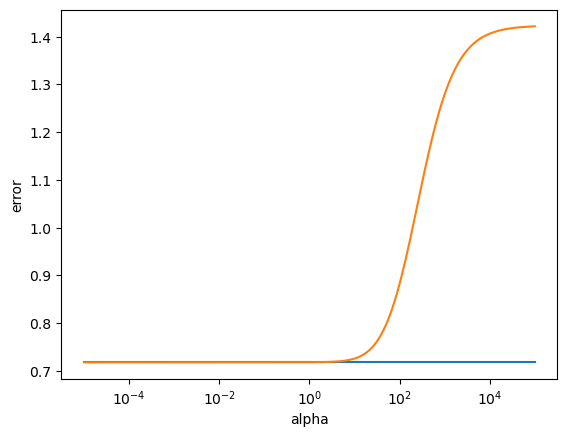

In [138]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

On voit sur la courbe que la régression ridge permet d'obtenir une erreur plus faible que la régression linéaire simple pour certaines valeurs de alpha.

In [139]:
min(errors)

[0.7174647710759258, 0.7174647717092124]

In [140]:
alpha_ridge = alphas[errors.index(min(errors))]
alpha_ridge

1e-05

**On voit que la régression Ridge n'apporte rien...**

## Régression Lasso

Passons à la régression Lasso.

In [141]:
from sklearn.linear_model import Lasso

n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_MSE, np.mean((lasso.predict(X_test_scaled)-y_test)**2)])

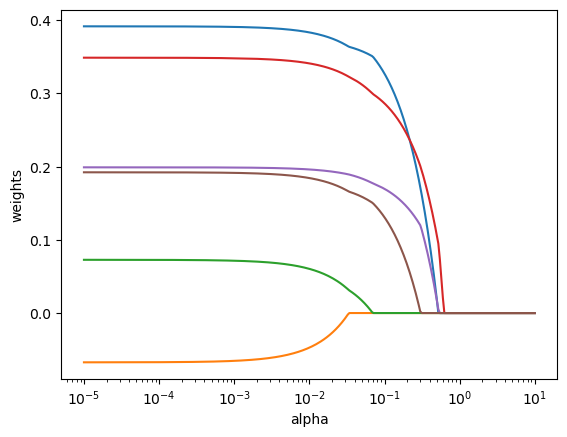

In [142]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

On voit que le Lasso permet de supprimer des variables en mettant leur poids à 0.

Que dire du comportement de l'erreur ?

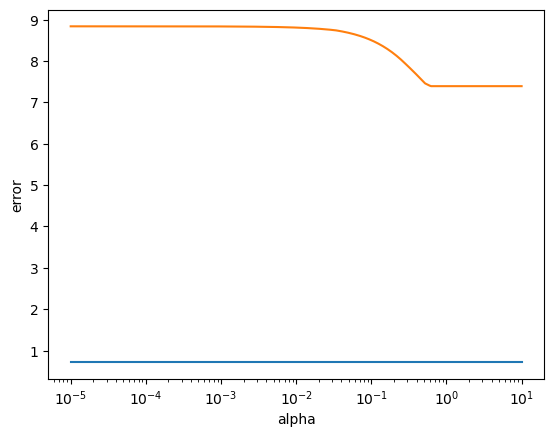

In [143]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
plt.axis("tight")
plt.show()

**C'est n'importe quoi...**